# Solving non-linear systems of equations

## Example:


$y = 2\,x + 3$

$y = x^2 +1$


## 1. Graphical solution of non-linear systems

In [1]:
# Importing packages

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. First we generate a vector for x

x = np.arange(-5., +5., 0.01)

# 2. Evaluate y

y_1 = 2.*x + 3.
y_2 = x**2 + 1.


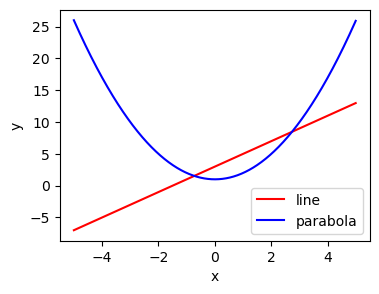

In [3]:
# Plotting
plt.figure(figsize=(4,3))

plt.plot(x, y_1, color = "red", label = "line")
plt.plot(x, y_2, color = "blue", label = "parabola")

plt.xlabel(r"x")
plt.ylabel(r"y")

plt.legend()

plt.show()

In [4]:
# 3. Get indices

idx = np.argwhere(np.diff(np.sign(y_2 - y_1))).flatten()

print(idx)

[426 773]


In [5]:
# 4. Evaluate vectors with idx

print("Solution 1 is: ", x[idx][0], y_1[idx][0])
print("Solution 2 is: ", x[idx][1], y_1[idx][1])

Solution 1 is:  -0.7400000000000908 1.5199999999998184
Solution 2 is:  2.7299999999998352 8.45999999999967


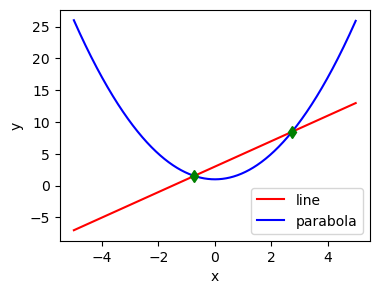

In [6]:
# 5. Plotting with the solutions
plt.figure(figsize=(4,3))

plt.plot(x, y_1, color = "red", label = "line")
plt.plot(x, y_2, color = "blue", label = "parabola")

# Solutions
plt.plot(x[idx][0], y_1[idx][0], color = "green", marker = "d")
plt.plot(x[idx][1], y_1[idx][1], color = "green", marker = "d")

plt.xlabel(r"x")
plt.ylabel(r"y")

plt.legend()

plt.show()

## 2. Solving non-linear systems using fsolve()

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html

In [7]:
# Import libraries

import scipy.optimize as opt

$y = 2\,x + 3\Rightarrow -2x+y-3 = 0$

$y = x^2 +1\Rightarrow x^2-y+1 = 0$



In [8]:
# Define the function

def obj_function(pair):
    """
    This function returns the two eqs.
    """
    x, y = pair
    
    return (-2.*x + y - 3., x**2 - y + 1.)

In [9]:
# Call the optimisation routine

x_1f, y_1f = opt.fsolve(obj_function, (4, 5))

print("Solution 1 is: ", x_1f, y_1f)

Solution 1 is:  2.732050807568877 8.464101615137755


In [10]:
# Call the optimisation routine

x_2f, y_2f = opt.fsolve(obj_function, (-2, 0))

print("Solution 2 is: ", x_2f, y_2f)

Solution 2 is:  -0.7320508075688772 1.5358983848622454


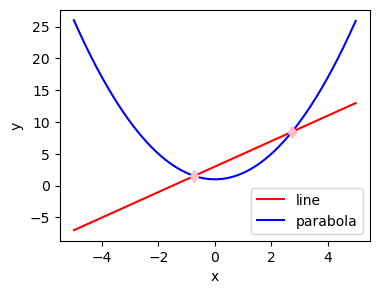

In [11]:
# 5. Plotting with the solutions
plt.figure(figsize=(4,3))

plt.plot(x, y_1, color = "red", label = "line")
plt.plot(x, y_2, color = "blue", label = "parabola")

# Solutions
plt.plot(x_1f, y_1f, color = "pink", marker = "d")
plt.plot(x_2f, y_2f, color = "pink", marker = "d")

plt.xlabel(r"x")
plt.ylabel(r"y")

plt.legend()

plt.show()

## 3. Solving non-linear systems using root()

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html


$y = 2\,x + 3$

$y = x^2 +1$

We divide the 2 eqs:

$1= \frac{2\,x + 3}{x^2 +1}$

$\Rightarrow F(x)= \frac{2\,x + 3}{x^2 +1} -1 = 0$


In [12]:
# Define function for optimisation

def obj_function_root(x):
    """
    This is a function of type F(x) = 0
    """
    obj_f = ((2.*x + 3)/(x**2 + 1.)) - 1.
    
    return obj_f

In [13]:
# Call optimise package

result_root = opt.root(obj_function_root, [-1, +1], tol = 1e-12)

print(result_root)

 message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00  0.000e+00]
       x: [-7.321e-01  2.732e+00]
    nfev: 14
    fjac: [[-1.000e+00  1.233e-03]
           [-1.233e-03 -1.000e+00]]
       r: [-2.236e+00  2.391e-02  4.128e-01]
     qtf: [-1.110e-15 -2.234e-16]


In [14]:
# Print solutions for x

print(result_root.x)

[-0.73205081  2.73205081]


In [15]:
# Evaluate y
y = lambda x: 2*x + 3

print("Solution 1 is: ", result_root.x[0], y(result_root.x[0]))
print("Solution 2 is: ", result_root.x[1], y(result_root.x[1]))

Solution 1 is:  -0.7320508075688773 1.5358983848622454
Solution 2 is:  2.732050807568877 8.464101615137753


## 4. Using symbolic algebra (sympy)

In [16]:
# Import sympy
import sympy as sp

# https://docs.sympy.org/latest/modules/solvers/solvers.html

In [17]:
# Define symbols

x, y = sp.symbols("x, y")

$y = 2\,x + 3$

$y = x^2 +1$

#### 1. First option with  sp.solvers.solve():

In [18]:
# Feed the equations to the solver

sln = sp.solvers.solve([y - 2.*x - 3., y - x**2 -1.], (x,y))

print(type(sln))

print("Solution 1: ", sln[0])
print("Solution 2: ", sln[1])

<class 'list'>
Solution 1:  (-0.732050807568877, 1.53589838486225)
Solution 2:  (2.73205080756888, 8.46410161513776)


#### 2. Second option with  sp.solvers.nonlinsolve():

In [19]:
# First define the system & symbols

system = [y - 2.*x - 3., y - x**2 -1.]
symbols = [x, y]

# Call the solver:

sln_2 = sp.solvers.nonlinsolve(system, symbols)

print(type(sln_2))

print(sln_2)
print("\n")
print(list(sln_2)[0],list(sln_2)[1] )
print("\n")

print(list(sln_2)[0][0])

<class 'sympy.sets.sets.FiniteSet'>
{(-0.732050807568877, 1.53589838486225), (2.73205080756888, 8.46410161513776)}


(-0.732050807568877, 1.53589838486225) (2.73205080756888, 8.46410161513776)


-0.732050807568877


In [20]:
# First define the system & symbols

system = [y - 2*x - 3, y - x**2 -1]
symbols = [x, y]

# Call the solver:

sln_2 = sp.solvers.nonlinsolve(system, symbols)

print(type(sln_2))

print(np.array(list(sln_2), float))

<class 'sympy.sets.sets.FiniteSet'>
[[ 2.73205081  8.46410162]
 [-0.73205081  1.53589838]]


## Example:

Find solution to:

$log_{10}(x)^{(log_{10}(x))} = 3^6$

First we need a functional:

$log_{10}(x)^{(log_{10}(x))} - 3^6 =0$

In [21]:
# Define symbols
x = sp.Symbol("x")

In [22]:
# Call the solve() function

sln_3 = sp.solvers.solve((sp.log(x, 10)\
                          **(sp.log(x, 10))) - 3**6, x)

sln_array = np.array(sln_3, float)
print("x = ", sln_array)

x =  [26867.16184628]


In [23]:
# RHS:
print(3**6)

729


In [24]:
# LHS:

print(np.log10(sln_array)**(np.log10(sln_array)))

[729.]
